In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [11]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [26]:
df1 = df.drop('CUST_ID', axis = 1) 
df1.fillna(method ='bfill', inplace = True) 

In [27]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1) 
normalized_df = normalize(df1) 
normalized_df = pd.DataFrame(normalized_df) 
pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
  
pcadf.head(10)

,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.315801,-0.045331,0.021005
1,0.315592,-0.156902,0.369849
2,-0.207156,-0.182853,-0.122065
3,-0.294886,-0.115253,-0.105940
4,0.140351,-0.089815,-0.090702
5,0.357316,0.198259,-0.407317
6,-0.196032,0.372616,-0.000407
7,0.114108,-0.126426,-0.256003
8,-0.325109,-0.103615,-0.032240
9,-0.402152,-0.055033,0.042919


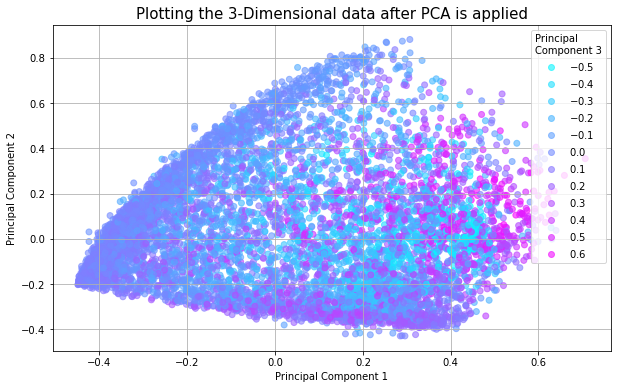

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6, cmap = 'cool')
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 15)
plt.xlabel('Principal Component 1', fontsize = 10)
plt.ylabel('Principal Component 2', fontsize = 10)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()

In [29]:
pca.explained_variance_ratio_

array([0.33143791, 0.2751133 , 0.16474062])

In [32]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(pcadf)

GaussianMixture(n_components=3)

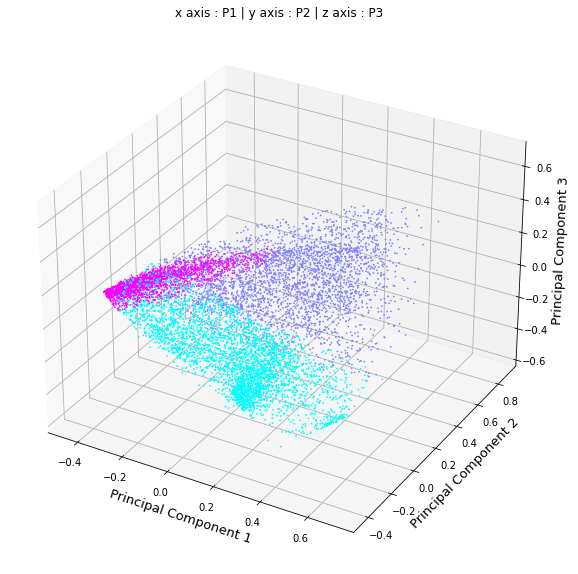

In [31]:
fig = plt.figure(figsize = (10, 10))
             
x, s1 = pcadf['Principal Component 1'], "Principal Component 1"
y, s2 = pcadf['Principal Component 2'], "Principal Component 2"
z, s3 = pcadf['Principal Component 3'], "Principal Component 3"

c = gmm.fit_predict(pcadf) 

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = c, s=0.5, alpha = 1, cmap = 'cool')
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1, fontsize = 13)
ax.set_ylabel(s2, fontsize = 13)
ax.set_zlabel(s3, fontsize = 13)

plt.show()

In [34]:
y_pred = gmm.predict(pcadf)
pred = pd.DataFrame(y_pred)
pred.columns = ['Type']

prediction = pd.concat([pcadf, pred], axis = 1)

clus0 = prediction.loc[prediction.Type == 0]
clus1 = prediction.loc[prediction.Type == 1]
clus2 = prediction.loc[prediction.Type == 2]

cluster_list = [clus0.values, clus1.values, clus2.values]

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pcadf
y = gmm.fit_predict(pcadf)
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, c, metric='euclidean')
    print("k = {} \t \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	 	0.28532164722160763
k = 3 	 	0.28532164722160763
k = 4 	 	0.28532164722160763
k = 5 	 	0.28532164722160763
k = 6 	 	0.28532164722160763
k = 7 	 	0.28532164722160763
k = 8 	 	0.28532164722160763
k = 9 	 	0.28532164722160763
k = 10 	 	0.28532164722160763


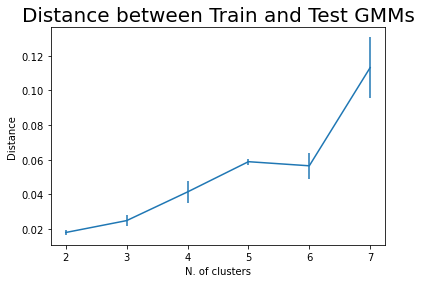

In [23]:
plt.errorbar(n_clusters, results, yerr=res_sigs)
plt.title("Distance between Train and Test GMMs", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Distance")
plt.show()

In [36]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pcadf, y_pred)

1.3149483070076222